# COVID-19 Spread Assessment in New York

Importing required libraries:

In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Read CSV data of COVID-19 cases and deaths in each New York county into a pandas dataframe.

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [159]:
df.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths      int64
dtype: object

In [ ]:
dfViz=df[df.state=='New York']
dfViz=dfViz[['date','cases']]
dfViz.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Date') # add to x-label to the plot
plt.ylabel('Number of cases') # add y-label to the plot
plt.title('Number of cases in New York') # add title to the plot

plt.show()

Since, the data consists of all the dates since the 1st patient was diagnosed in the USA, so focusing the analysis to the cummulative cases on 9th April 2020 in the state of New York.

In [4]:
df_Latest=df[(df.date=='2020-04-09') & (df.state=='New York')].reset_index(drop=True)

In [87]:
df_Latest

,date,county,state,fips,cases,deaths
0,2020-04-09,Albany,New York,36001.0,379,12
1,2020-04-09,Allegany,New York,36003.0,22,0
2,2020-04-09,Broome,New York,36007.0,105,6
3,2020-04-09,Cattaraugus,New York,36009.0,17,0
4,2020-04-09,Cayuga,New York,36011.0,16,1
5,2020-04-09,Chautauqua,New York,36013.0,18,1
6,2020-04-09,Chemung,New York,36015.0,59,2
7,2020-04-09,Chenango,New York,36017.0,55,0
8,2020-04-09,Clinton,New York,36019.0,40,0
9,2020-04-09,Columbia,New York,36021.0,70,4


The data contains reported cases and deaths from 58 counties.

In [ ]:
df_Latest.shape[0]

In [5]:
dfViz1=df_Latest.sort_values(['cases'], ascending=False, axis=0)

# get the top 5 entries
df_top5 = dfViz1.head(10)
df_top5=df_top5[['county','cases']]

# transpose the dataframe
#df_top5= df_top5.transpose() 

df_top5.head()

,county,cases
28,New York City,87028
27,Nassau,20140
47,Suffolk,17413
55,Westchester,17004
39,Rockland,6665


In [169]:
df_top5

,cases
county,
New York City,87028
Nassau,20140
Suffolk,17413
Westchester,17004
Rockland,6665
Orange,4090
Dutchess,1493
Erie,1362
Monroe,698


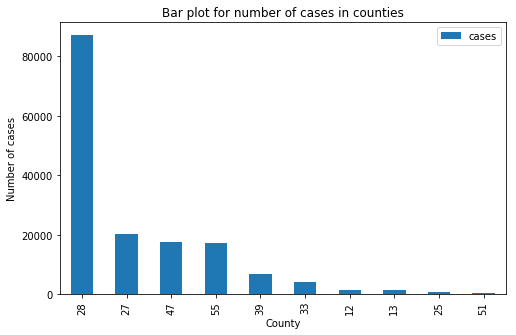

In [6]:
#df_top5 = df_top5.set_index('county')
# let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='bar', 
             figsize=(8, 5)# pass a tuple (x, y) size
             )

plt.title('Bar plot for number of cases in counties')
plt.ylabel('Number of cases')
plt.xlabel('County')

plt.show()

Next, reading in population data of New York into a dataframe, and selecting the population density column along with respective county.

In [7]:
# The code was removed by Watson Studio for sharing.

,Name,2020 Population,Growth Since 2010
0,Kings County,2582830,0.0291
1,Queens County,2278906,0.0198
2,New York County,1628701,0.0251
3,Suffolk County,1481093,-0.0089
4,Bronx County,1432132,0.0323


In [160]:
df_data_0.dtypes

Name                   object
2020 Population         int64
Growth Since 2010     float64
dtype: object

In [8]:
dfPopNY=df_data_0.iloc[:, 0:2]

In [9]:
dfPopNY.rename(columns={"Name ":"county",'2020 Population ':'2020 Population'},inplace=True)

In [10]:
dfPopNY['county']= dfPopNY['county'].map(lambda x: x.rstrip(' County'))

In [126]:
print(sorted(dfPopNY.county))

['Alba', 'Allega', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga', 'Chautauqua', 'Chemung', 'Chenang', 'Cli', 'Columbia', 'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Frankli', 'Ful', 'Genesee', 'Greene', 'Hamil', 'Herkimer', 'Jeffers', 'Kings', 'Lewis', 'Livings', 'Madis', 'Monroe', 'Montgomer', 'Nassa', 'New York', 'Niagara', 'Oneida', 'Onondaga', 'Ontari', 'Orange', 'Orleans', 'Osweg', 'Otseg', 'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland', 'Saratoga', 'Schenectad', 'Schoharie', 'Schuyler', 'Seneca', 'St. Lawrence', 'Steube', 'Suffolk', 'Sulliva', 'Tioga', 'Tompkins', 'Ulster', 'Warre', 'Washing', 'Wayne', 'Westchester', 'Wyoming', 'Yates']


In [127]:
print(sorted(df_Latest.county))

['Albany', 'Allegany', 'Broome', 'Cattaraugus', 'Cayuga', 'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia', 'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin', 'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery', 'Nassau', 'New York City', 'Niagara', 'Oneida', 'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego', 'Putnam', 'Rensselaer', 'Rockland', 'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca', 'St. Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 'Ulster', 'Warren', 'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates']


In [11]:
dfPopNY["county"].replace({"Alba": "Albany", "Allega": "Allegany"}, inplace=True)

In [12]:
dfPopNY["county"].replace({"Chenang": "Chenango", "Cli": "Clinton",'Frankli':'Franklin','Ful':'Fulton','Hamil':'Hamilton','Jeffers':'Jefferson','Livings':'Livingston',"Madis":'Madison'}, inplace=True)

In [13]:
dfPopNY["county"].replace({"Montgomer": "Montgomery", "Nassa": "Nassau",'New York':'New York City','Ontari':'Ontario','Osweg':'Oswego','Otseg':'Otsego','Schenectad':'Schenectady',"Steube":'Steuben','Sulliva':'Sullivan','Warre':'Warren','Washing':'Washington'}, inplace=True)

In [138]:
dfPopNY

,county,2020 Population
0,Kings,2582830
1,Queens,2278906
2,New York City,1628701
3,Suffolk,1481093
4,Bronx,1432132
5,Nassau,1358343
6,Westchester,967612
7,Erie,919719
8,Monroe,742474
9,Richmond,476179


In [14]:
dfPopNY['county'].isin(df_Latest['county'])

0     False
1     False
2      True
3      True
4     False
5      True
6      True
7      True
8      True
9     False
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
51     True
52     True
53     True
54     True
55     True
56     True
57     True
58     True
59     True
60     True
61     True
Name: county, dtype: bool

A new empty dataframe is created with latitude longitude columns to hold the location coordinates of each county. This dataframe is being filed using the Nominatim from geolocator.

In [15]:
# define the dataframe columns
column_names = ['County', 'Latitude', 'Longitude'] 

# instantiate the dataframe
dfCoord = pd.DataFrame(columns=column_names)

In [16]:
geolocator = Nominatim(user_agent="ny_explorer")
for x in df_Latest.itertuples():
    address= str(x.county) + ', NY'
    location = geolocator.geocode(address)
    dfCoord=dfCoord.append({'County':x.county,"Latitude":location.latitude,"Longitude":location.longitude},ignore_index=True)

In [15]:
dfCoord.head()

,County,Latitude,Longitude
0,Albany,42.651167,-73.754968
1,Allegany,42.244606,-78.041928
2,Broome,42.145562,-75.840411
3,Cattaraugus,42.223482,-78.647710
4,Cayuga,42.809341,-76.570078


All the three dataframes above are joined on the column containing county name. The extra county columns are dropped, and the resulting dataframe is called df_NYCoord.

In [17]:
df_NYCoord = pd.merge(df_Latest, dfCoord, left_on='county',right_on='County')

In [18]:
df_NYCoord.drop('County',axis=1,inplace=True)

In [19]:
df_NYCoord = pd.merge(df_NYCoord, dfPopNY, how= 'inner',on='county')

In [144]:
df_NYCoord.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths', 'Latitude',
       'Longitude', '2020 Population '],
      dtype='object')

In [20]:
df_NYCoord['deaths']=df_NYCoord['deaths'].div(df_NYCoord['cases'])*100

In [21]:
df_NYCoord['cases']=df_NYCoord['cases'].div(df_NYCoord['2020 Population'])*100

In [22]:
df_NYCoord

,date,county,state,fips,cases,deaths,Latitude,Longitude,2020 Population
0,2020-04-09,Albany,New York,36001.0,0.123406,3.166227,42.651167,-73.754968,307117
1,2020-04-09,Allegany,New York,36003.0,0.047383,0.000000,42.244606,-78.041928,46430
2,2020-04-09,Broome,New York,36007.0,0.054785,5.714286,42.145562,-75.840411,191659
3,2020-04-09,Cattaraugus,New York,36009.0,0.022124,0.000000,42.223482,-78.647710,76840
4,2020-04-09,Cayuga,New York,36011.0,0.020740,6.250000,42.809341,-76.570078,77145
5,2020-04-09,Chautauqua,New York,36013.0,0.014069,5.555556,42.289467,-79.421728,127939
6,2020-04-09,Chemung,New York,36015.0,0.070026,3.389831,42.138467,-76.772549,84254
7,2020-04-09,Chenango,New York,36017.0,0.115702,0.000000,42.478457,-75.613028,47536
8,2020-04-09,Clinton,New York,36019.0,0.049569,0.000000,43.048403,-75.378503,80695
9,2020-04-09,Columbia,New York,36021.0,0.116830,5.714286,43.048218,-73.800545,59916


Initiating foursquare credential variables.

In [22]:
CLIENT_ID = '0J0TRFUIL2P1HXHXOTGOELH4CVTZTQAQH4R4CARJKODDMXNP' # your Foursquare ID
CLIENT_SECRET = '3EC3NGHVOFUSS4XHHQDTPC3ADJ1PPQG1DUWMNM0OLVZ0GHCM' # your Foursquare Secret
VERSION = '20200412' # Foursquare API version

Defining LIMIT and categoryId of venue categories of travel, food, and nightlife.

In [23]:
categoryIdFood='4d4b7105d754a06374d81259'
categoryIdTravel='4d4b7105d754a06379d81259'
categoryIdNightLife='4d4b7105d754a06376d81259'

In [32]:
df_NYCoord.loc[0,'county']

'Albany'

In [33]:
county_latitude = df_NYCoord.loc[0, 'Latitude'] # county latitude value
county_longitude = df_NYCoord.loc[0, 'Longitude'] # county longitude value

county_name = df_NYCoord.loc[0, 'county'] # county name

In [40]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
intent='browse'
# create URL
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&near={}&intent={}&radius={}&categoryId={},{},{}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            county_name+', NY',
            intent,
            radius,
            categoryIdFood,
            categoryIdTravel,
            categoryIdNightLife,
            LIMIT)
url

'https://api.foursquare.com/v2/venues/search?&client_id=ASDSUEOU1SLLUBSAXIAEZNVYKTIRMT0W0JYGA3GZOH4M1VAE&client_secret=ANHQWJ4CBE4V0QY04YCUCOQ14L1MHWF4PLP5TDQEXLDCSXJ3&v=20200412&near=Albany, NY&intent=browse&radius=500&categoryId=4d4b7105d754a06374d81259,4d4b7105d754a06379d81259,4d4b7105d754a06376d81259&limit=100'

In [41]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e943e34df2774001c002334'},
 'response': {'venues': [{'id': '506f3ecee4b05bc7630a92a2',
    'name': 'Elk Street Parking Lot',
    'location': {'lat': 42.654942806659264,
     'lng': -73.7583917244189,
     'labeledLatLngs': [{'label': 'display',
       'lat': 42.654942806659264,
       'lng': -73.7583917244189}],
     'postalCode': '12210',
     'cc': 'US',
     'city': 'Albany',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['Albany, NY 12210', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d1f9931735',
      'name': 'Road',
      'pluralName': 'Roads',
      'shortName': 'Road',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/highway_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1586773394',
    'hasPerk': False},
   {'id': '55df71a0498e446117fb34b7',
    'name': 'State St. & Eagle St. Bus Stop',
    'location': {'address': 'State Street',
     'cross

Borrowing the function 'get_category_type' and 'getNearbyVenues' from the lab.

In [25]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

In [54]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

31 venues were returned by Foursquare.


In [129]:
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&near={}&intent={}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            'Albany, NY',
            'browse',
            500,
            categoryIdFood,
            100)
url

'https://api.foursquare.com/v2/venues/search?&client_id=0J0TRFUIL2P1HXHXOTGOELH4CVTZTQAQH4R4CARJKODDMXNP&client_secret=3EC3NGHVOFUSS4XHHQDTPC3ADJ1PPQG1DUWMNM0OLVZ0GHCM&v=20200412&near=Albany, NY&intent=browse&radius=500&categoryId=4d4b7105d754a06374d81259&limit=100'

In [24]:
LIMIT=100
def getNearbyVenues(names, cases, deaths, radius= 750, intent ='browse'):
    
    venues_list=[]
    for  name, case, death in zip(names, cases, deaths):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&near={}&intent={}&radius={}&categoryId={},{}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            name+', NY',
            intent,
            radius,
            categoryIdTravel,
            categoryIdNightLife,
            LIMIT)  
        # make the GET request
        results = requests.get(url).json()['response']['venues']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            case,
            death,
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name'])for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['County',
                             'Cases',
                             'Deaths',
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [44]:
LIMIT=100
def getNearbyVenuesF(names, cases, deaths, radius= 750, intent ='browse'):
    
    venues_list=[]
    for  name, case, death in zip(names, cases, deaths):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&near={}&intent={}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            name+', NY',
            intent,
            radius,
            categoryIdFood,
            LIMIT)  
        # make the GET request
        results = requests.get(url).json()['response']['venues']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            case,
            death,
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name'])for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['County',
                             'Cases',
                             'Deaths',
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [25]:
# type your answer here

newyork_venues_TravelNL = getNearbyVenues(names=df_NYCoord['county'],cases=df_NYCoord['cases'],deaths=df_NYCoord['deaths'])

Albany
Allegany
Broome
Cattaraugus
Cayuga
Chautauqua
Chemung
Chenango
Clinton
Columbia
Cortland
Delaware
Dutchess
Erie
Essex
Franklin
Fulton
Genesee
Greene
Hamilton
Herkimer
Jefferson
Lewis
Livingston
Madison
Monroe
Montgomery
Nassau
New York City
Niagara
Oneida
Onondaga
Ontario
Orange
Orleans
Oswego
Otsego
Putnam
Rensselaer
Rockland
Saratoga
Schenectady
Schoharie
Schuyler
Seneca
St. Lawrence
Steuben
Suffolk
Sullivan
Tioga
Tompkins
Ulster
Warren
Washington
Wayne
Westchester
Wyoming
Yates


In [45]:
# type your answer here

newyork_venues_Food = getNearbyVenuesF(names=df_NYCoord['county'],cases=df_NYCoord['cases'],deaths=df_NYCoord['deaths'])

Albany
Allegany
Broome
Cattaraugus
Cayuga
Chautauqua
Chemung
Chenango
Clinton
Columbia
Cortland
Delaware
Dutchess
Erie
Essex
Franklin
Fulton
Genesee
Greene
Hamilton
Herkimer
Jefferson
Lewis
Livingston
Madison
Monroe
Montgomery
Nassau
New York City
Niagara
Oneida
Onondaga
Ontario
Orange
Orleans
Oswego
Otsego
Putnam
Rensselaer
Rockland
Saratoga
Schenectady
Schoharie
Schuyler
Seneca
St. Lawrence
Steuben
Suffolk
Sullivan
Tioga
Tompkins
Ulster
Warren
Washington
Wayne
Westchester
Wyoming
Yates


In [47]:
print(newyork_venues_TravelNL.shape)
newyork_venues_TravelNL.head()

(518, 7)


,County,Cases,Deaths,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albany,0.123406,3.166227,C.H. Evans Brewing Co. at the Albany Pump Station,42.654076,-73.747658,Brewery
1,Albany,0.123406,3.166227,Elk Street Parking Lot,42.654943,-73.758392,Road
2,Albany,0.123406,3.166227,New Madison Grille,42.650193,-73.763589,Pub
3,Albany,0.123406,3.166227,State St. & Eagle St. Bus Stop,42.651538,-73.755018,Bus Stop
4,Albany,0.123406,3.166227,Hilton,42.650647,-73.753123,Hotel


In [46]:
print(newyork_venues_Food.shape)
newyork_venues_Food.head()

(660, 7)


,County,Cases,Deaths,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albany,0.123406,3.166227,C.H. Evans Brewing Co. at the Albany Pump Station,42.654076,-73.747658,Brewery
1,Albany,0.123406,3.166227,Mugshots,42.651457,-73.749955,Coffee Shop
2,Albany,0.123406,3.166227,Iron Gate Cafe,42.655974,-73.762504,Café
3,Albany,0.123406,3.166227,The Hollow,42.652299,-73.750831,American Restaurant
4,Albany,0.123406,3.166227,Dove + Deer,42.654634,-73.761936,Restaurant


In [100]:
newyork_venues_Food.groupby('County').count()

,Cases,Deaths,Venue,Venue Latitude,Venue Longitude,Venue Category
County,,,,,,
Albany,50,50,50,50,50,50
Allegany,17,17,17,17,17,17
Broome,1,1,1,1,1,1
Cattaraugus,3,3,3,3,3,3
Cayuga,1,1,1,1,1,1
Chautauqua,38,38,38,38,38,38
Chemung,1,1,1,1,1,1
Clinton,34,34,34,34,34,34
Cortland,50,50,50,50,50,50


In [48]:
print('There are {} uniques categories.'.format(len(newyork_venues_TravelNL['Venue Category'].unique())))

There are 63 uniques categories.


In [49]:
print('There are {} uniques categories.'.format(len(newyork_venues_Food['Venue Category'].unique())))

There are 74 uniques categories.


In [50]:
# one hot encoding
NY_onehot_food= pd.get_dummies(newyork_venues_Food[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NY_onehot_food['County'] = newyork_venues_Food['County']
NY_onehot_food['Cases'] = newyork_venues_Food['Cases']
NY_onehot_food['Deaths'] = newyork_venues_Food['Deaths']
NY_onehot_food.shape

(660, 77)

In [51]:
# move neighborhood column to the first column
fixed_columns = list(NY_onehot_food.columns[-3:]) + list(NY_onehot_food.columns[:-3])
NY_onehot_food = NY_onehot_food[fixed_columns]
NY_onehot_food.head()

,County,Cases,Deaths,American Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Bistro,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Café,Cajun / Creole Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Convenience Store,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner,Donut Shop,Farmers Market,Fast Food Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gas Station,Gastropub,Gourmet Shop,Greek Restaurant,Gym / Fitness Center,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Kosher Restaurant,Lounge,Mac & Cheese Joint,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,New American Restaurant,Pizza Place,Pub,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Albany,0.123406,3.166227,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Albany,0.123406,3.166227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Albany,0.123406,3.166227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Albany,0.123406,3.166227,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Albany,0.123406,3.166227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
NY_TrvNL_grouped = NY_onehot_tavNL.groupby(['County','Cases','Deaths']).sum().reset_index()
NY_TrvNL_grouped

,County,Cases,Deaths,American Restaurant,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Boarding House,Boat or Ferry,Brewery,Building,Burrito Place,Bus Line,Bus Station,Bus Stop,Cajun / Creole Restaurant,Cocktail Bar,Dive Bar,Event Space,Gastropub,Gay Bar,General Travel,History Museum,Hookah Bar,Hotel,Hotel Bar,Intersection,Karaoke Bar,Liquor Store,Lounge,Metro Station,Motel,Moving Target,New American Restaurant,Nightclub,Nightlife Spot,Other Nightlife,Piano Bar,Pier,Plane,Platform,Pub,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Road,Speakeasy,Sports Bar,Steakhouse,Strip Club,Taxi,Tiki Bar,Tour Provider,Tourist Information Center,Train,Train Station,Transportation Service,Travel & Transport,Travel Agency,Travel Lounge,Tunnel,Wine Bar
0,Albany,0.123406,3.166227,1,5,0,0,0,0,0,0,1,0,0,3,3,3,1,1,0,0,1,0,2,0,0,6,2,0,0,0,2,0,0,1,0,3,0,1,0,0,0,0,7,1,0,0,0,1,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,Allegany,0.047383,0.000000,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Broome,0.054785,5.714286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Cayuga,0.020740,6.250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chautauqua,0.014069,5.555556,0,0,3,0,0,1,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0
5,Chemung,0.070026,3.389831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,Clinton,0.049569,0.000000,0,2,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,Cortland,0.033457,0.000000,1,12,2,0,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3,1,0,0,0,0,2,0,0,4,0,2,1,5,0,0,0,0,2,0,1,0,0,0,3,1,0,0,3,0,0,0,0,0,0,0,0,1,0,0,1
8,Essex,0.021448,0.000000,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Franklin,0.021872,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [52]:
NY_Food_grouped = NY_onehot_food.groupby(['County','Cases','Deaths']).sum().reset_index()
NY_Food_grouped

,County,Cases,Deaths,American Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Bistro,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Café,Cajun / Creole Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Convenience Store,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner,Donut Shop,Farmers Market,Fast Food Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gas Station,Gastropub,Gourmet Shop,Greek Restaurant,Gym / Fitness Center,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Kosher Restaurant,Lounge,Mac & Cheese Joint,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,New American Restaurant,Pizza Place,Pub,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Albany,0.123406,3.166227,4,0,0,0,0,0,0,0,1,0,1,0,0,0,0,6,1,1,0,3,0,0,5,1,0,2,0,0,4,0,2,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,2,0,0,1,4,1,3,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0
1,Allegany,0.047383,0.000000,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Cattaraugus,0.022124,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Chautauqua,0.014069,5.555556,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Clinton,0.049569,0.000000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,3,0,0,0,1,0,1,0,1,2,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,3,0,3,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0
5,Cortland,0.033457,0.000000,4,0,1,2,1,2,2,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,2,2,3,0,1,1,7,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,9,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Erie,0.148089,3.377386,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Essex,0.021448,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,Franklin,0.021872,0.000000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Fulton,0.027990,0.000000,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,0,2,0,3,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
! pip install seaborn

In [29]:
import seaborn as sns
%matplotlib inline

In [53]:
NY_Food_grouped.dtypes

County                              object
Cases                              float64
Deaths                             float64
American Restaurant                  uint8
Argentinian Restaurant               uint8
Asian Restaurant                     uint8
BBQ Joint                            uint8
Bagel Shop                           uint8
Bakery                               uint8
Bar                                  uint8
Bed & Breakfast                      uint8
Bistro                               uint8
Breakfast Spot                       uint8
Brewery                              uint8
Bubble Tea Shop                      uint8
Buffet                               uint8
Burger Joint                         uint8
Burrito Place                        uint8
Café                                 uint8
Cajun / Creole Restaurant            uint8
Chinese Restaurant                   uint8
Cocktail Bar                         uint8
Coffee Shop                          uint8
Convenience

In [140]:
NY_food_grouped.columns

Index(['County', 'Cases', 'Deaths', 'American Restaurant',
       'Argentinian Restaurant', 'Asian Restaurant', 'BBQ Joint', 'Bagel Shop',
       'Bakery', 'Bar', 'Bed & Breakfast', 'Bistro', 'Breakfast Spot',
       'Brewery', 'Bubble Tea Shop', 'Buffet', 'Burger Joint', 'Burrito Place',
       'Café', 'Cajun / Creole Restaurant', 'Chinese Restaurant',
       'Cocktail Bar', 'Coffee Shop', 'Convenience Store', 'Cupcake Shop',
       'Deli / Bodega', 'Dessert Shop', 'Diner', 'Donut Shop',
       'Farmers Market', 'Fast Food Restaurant', 'Food', 'Food Court',
       'Food Truck', 'French Restaurant', 'Fried Chicken Joint',
       'Frozen Yogurt Shop', 'Gas Station', 'Gastropub', 'Gourmet Shop',
       'Greek Restaurant', 'Gym / Fitness Center', 'Hot Dog Joint', 'Hotel',
       'Ice Cream Shop', 'Indian Restaurant', 'Irish Pub',
       'Italian Restaurant', 'Japanese Restaurant', 'Juice Bar',
       'Korean Restaurant', 'Kosher Restaurant', 'Lounge',
       'Mac & Cheese Joint', 'Mediter

In [143]:
for column in NY_food_grouped[['American Restaurant',
       'Argentinian Restaurant', 'Asian Restaurant', 'BBQ Joint', 'Bagel Shop',
       'Bakery', 'Bar', 'Bed & Breakfast', 'Bistro', 'Breakfast Spot',
       'Brewery', 'Bubble Tea Shop', 'Buffet', 'Burger Joint', 'Burrito Place',
       'Café', 'Cajun / Creole Restaurant', 'Chinese Restaurant',
       'Cocktail Bar', 'Coffee Shop', 'Convenience Store', 'Cupcake Shop',
       'Deli / Bodega', 'Dessert Shop', 'Diner', 'Donut Shop',
       'Farmers Market', 'Fast Food Restaurant', 'Food', 'Food Court',
       'Food Truck', 'French Restaurant', 'Fried Chicken Joint',
       'Frozen Yogurt Shop', 'Gas Station', 'Gastropub', 'Gourmet Shop',
       'Greek Restaurant', 'Gym / Fitness Center', 'Hot Dog Joint', 'Hotel',
       'Ice Cream Shop', 'Indian Restaurant', 'Irish Pub',
       'Italian Restaurant', 'Japanese Restaurant', 'Juice Bar',
       'Korean Restaurant', 'Kosher Restaurant', 'Lounge',
       'Mac & Cheese Joint', 'Mediterranean Restaurant', 'Mexican Restaurant',
       'Middle Eastern Restaurant', 'Moroccan Restaurant',
       'New American Restaurant', 'Pizza Place', 'Pub', 'Restaurant',
       'Salad Place', 'Sandwich Place', 'Seafood Restaurant', 'Snack Place',
       'Southern / Soul Food Restaurant', 'Souvlaki Shop',
       'Spanish Restaurant', 'Steakhouse', 'Sushi Restaurant', 'Taco Place',
       'Tea Room', 'Thai Restaurant', 'Vegetarian / Vegan Restaurant',
       'Vietnamese Restaurant', 'Wings Joint']]:
   # Select column contents by column name using [] operator
       print(NY_food_grouped[['Deaths',column]].corr())


                       Deaths  American Restaurant
Deaths               1.000000            -0.000412
American Restaurant -0.000412             1.000000
                          Deaths  Argentinian Restaurant
Deaths                  1.000000               -0.132416
Argentinian Restaurant -0.132416                1.000000
                    Deaths  Asian Restaurant
Deaths            1.000000          0.250715
Asian Restaurant  0.250715          1.000000
             Deaths  BBQ Joint
Deaths     1.000000   0.045445
BBQ Joint  0.045445   1.000000
              Deaths  Bagel Shop
Deaths      1.000000    0.154593
Bagel Shop  0.154593    1.000000
          Deaths    Bakery
Deaths  1.000000  0.056406
Bakery  0.056406  1.000000
          Deaths       Bar
Deaths  1.000000 -0.040059
Bar    -0.040059  1.000000
                   Deaths  Bed & Breakfast
Deaths           1.000000         0.191227
Bed & Breakfast  0.191227         1.000000
          Deaths    Bistro
Deaths  1.000000  0.154507
Bist

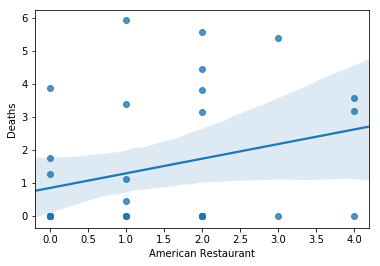

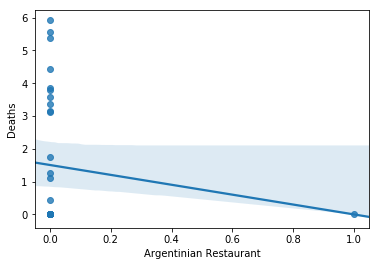

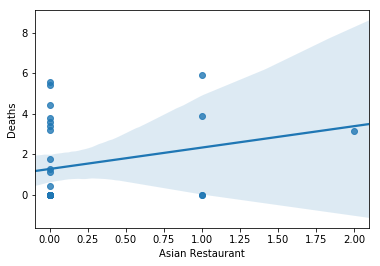

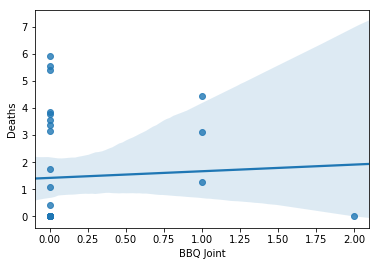

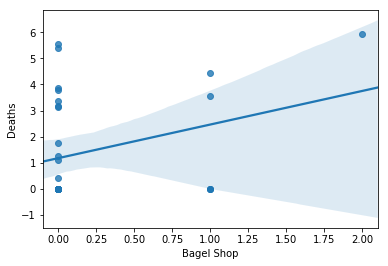

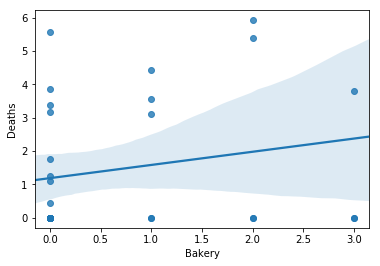

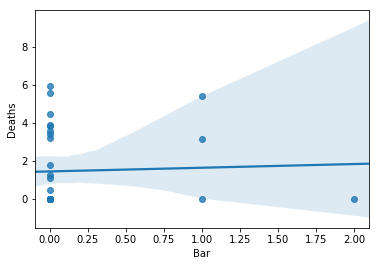

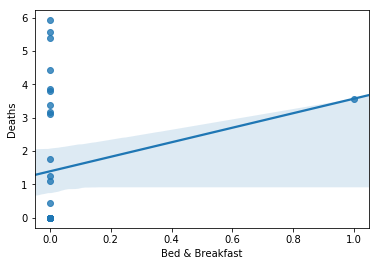

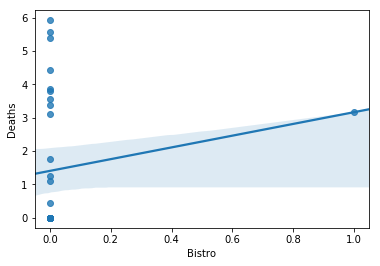

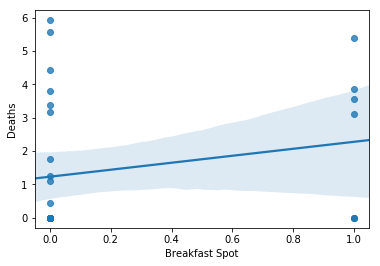

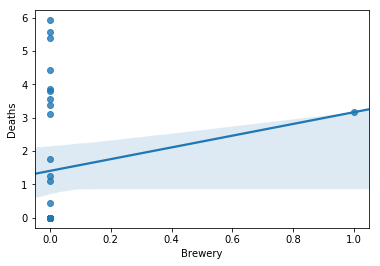

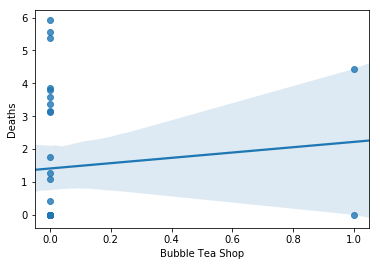

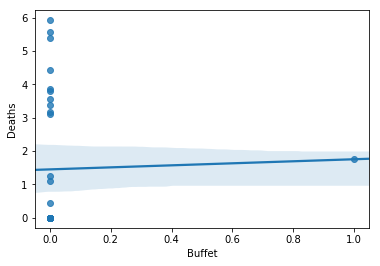

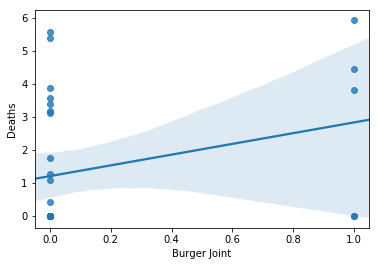

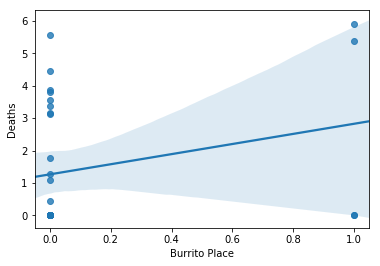

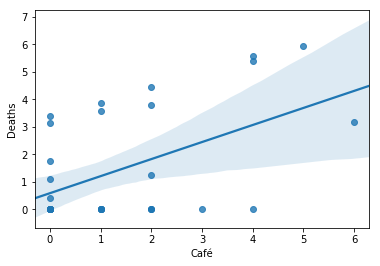

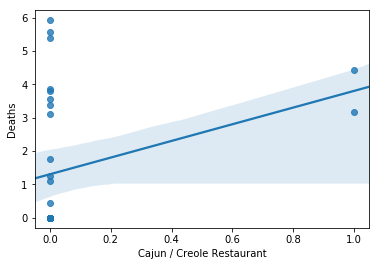

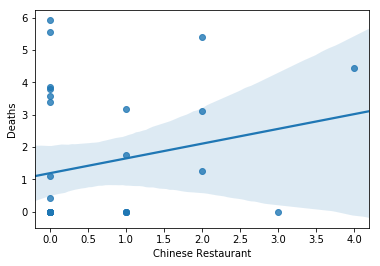

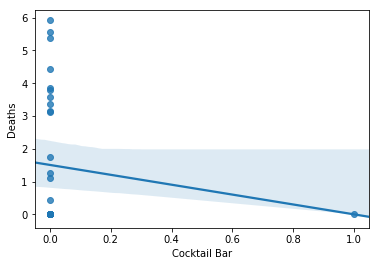

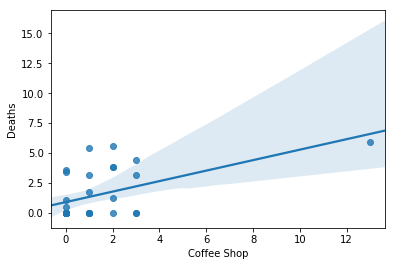

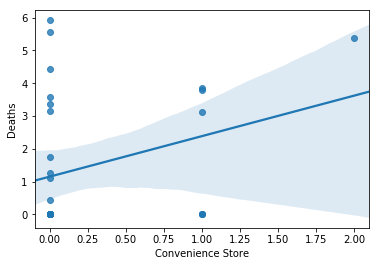

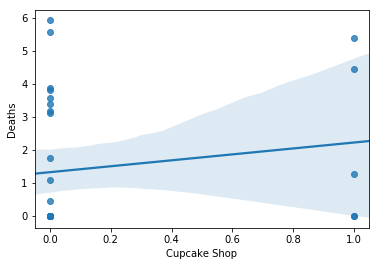

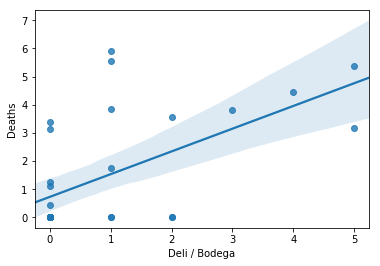

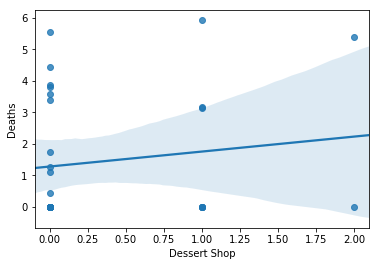

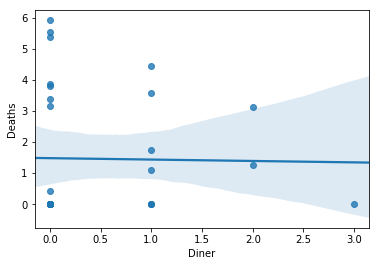

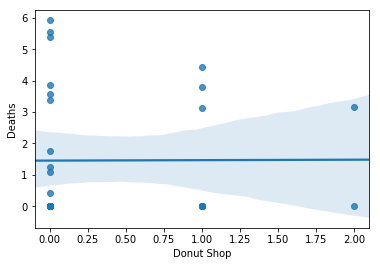

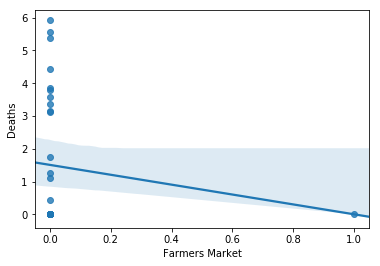

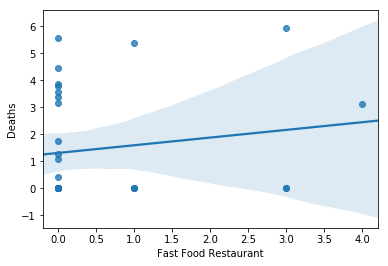

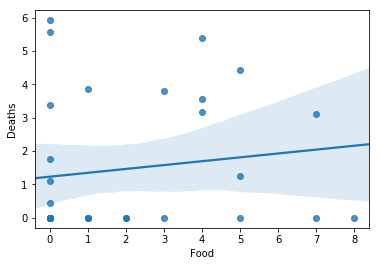

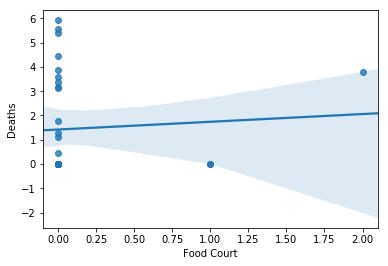

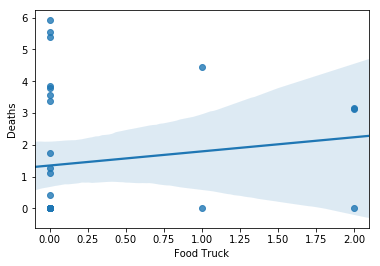

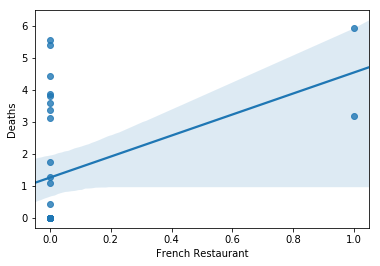

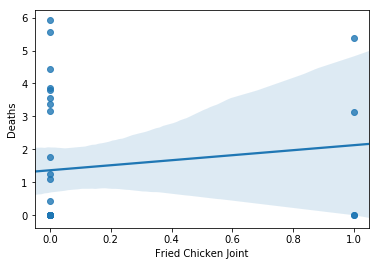

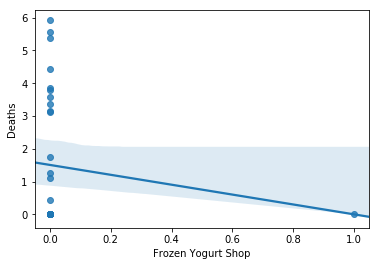

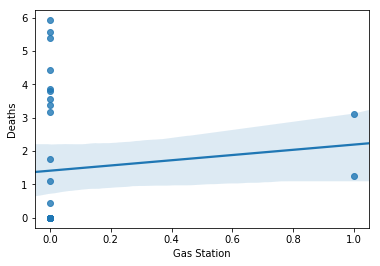

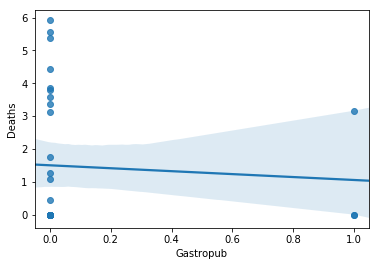

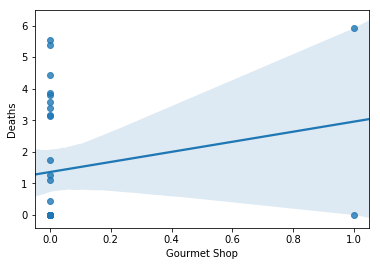

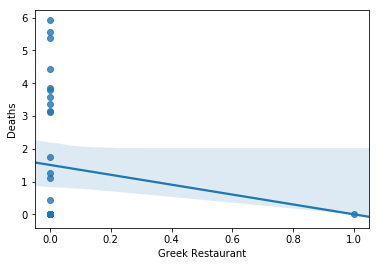

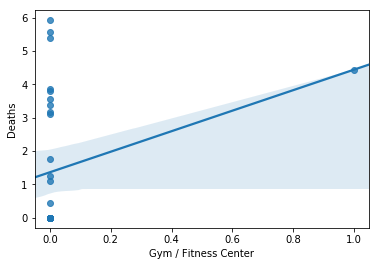

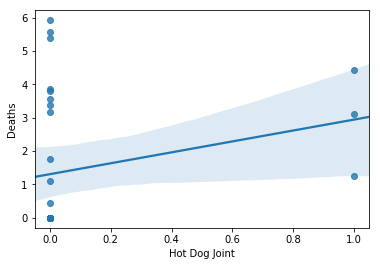

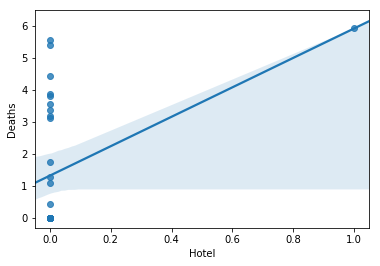

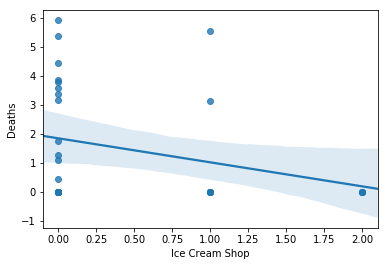

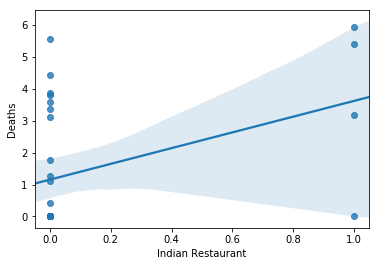

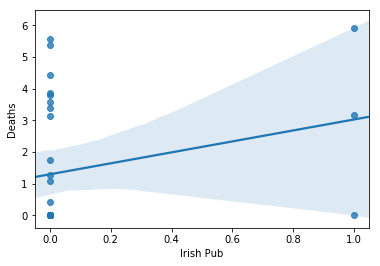

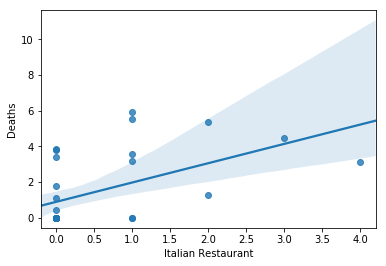

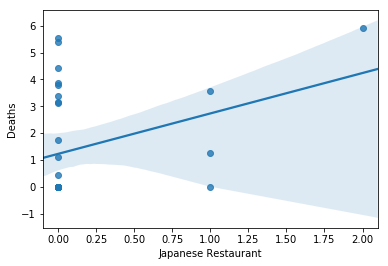

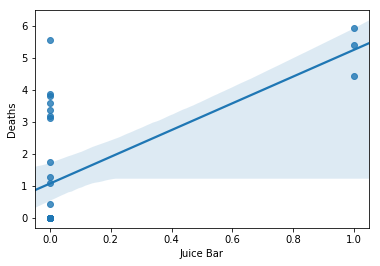

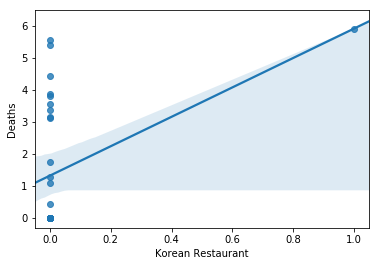

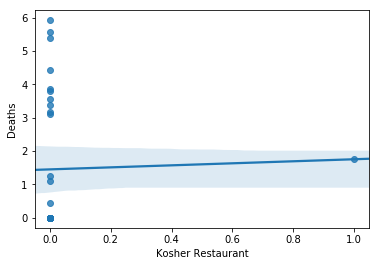

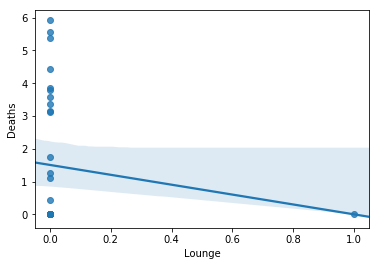

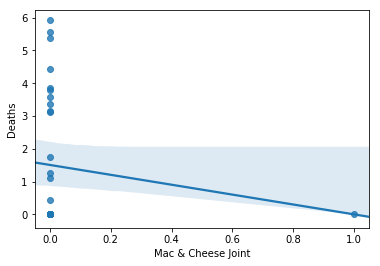

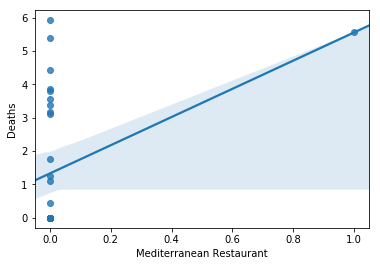

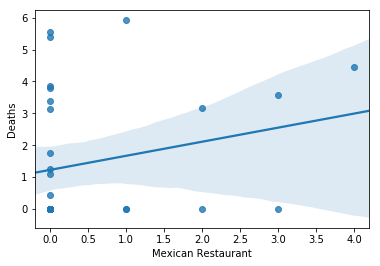

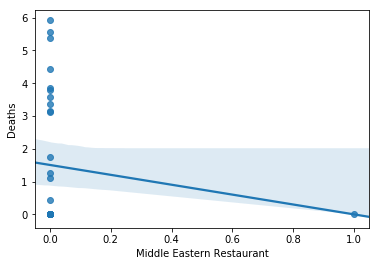

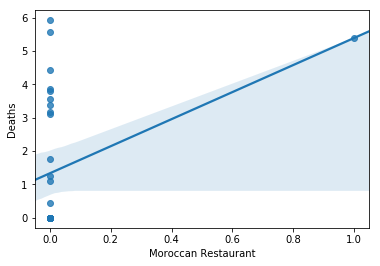

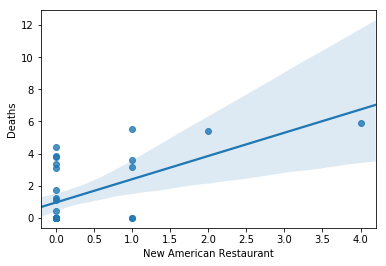

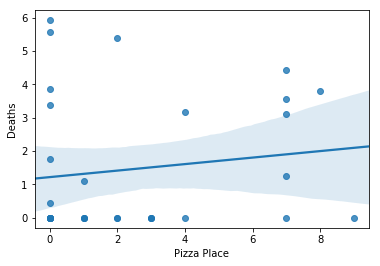

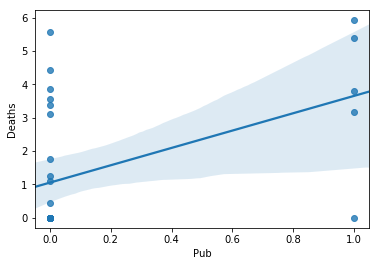

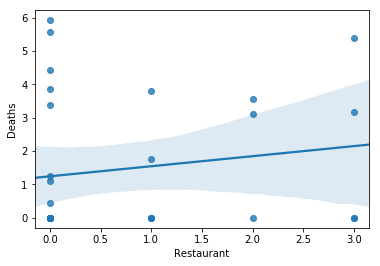

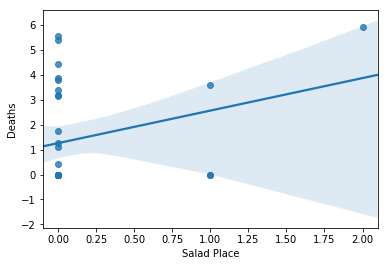

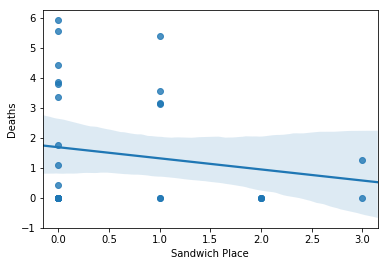

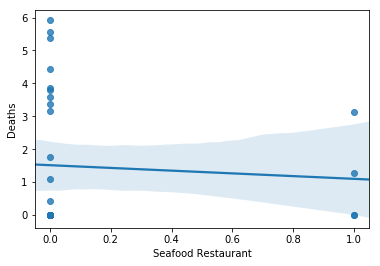

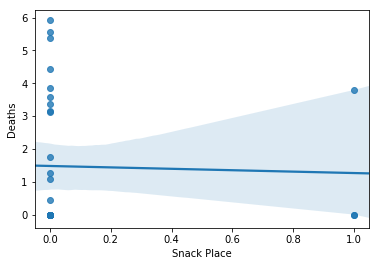

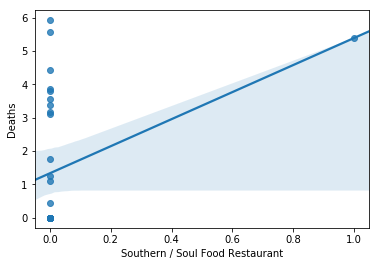

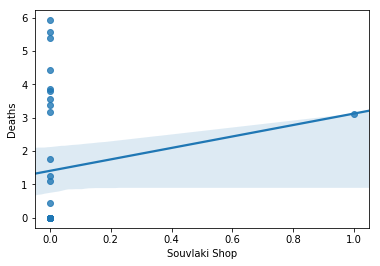

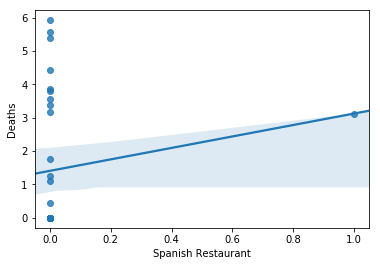

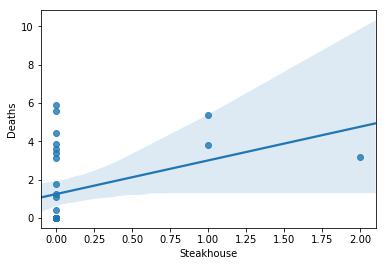

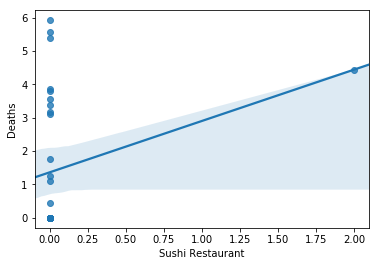

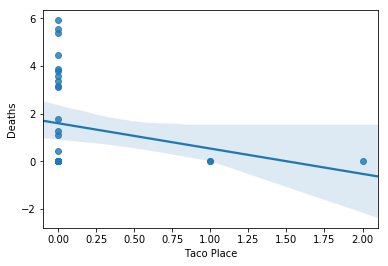

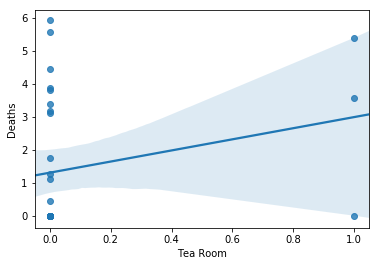

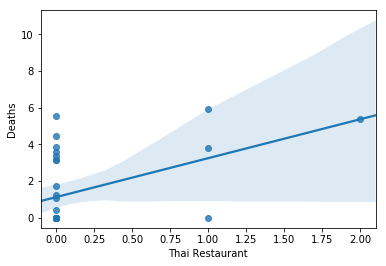

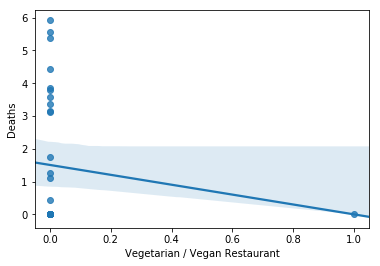

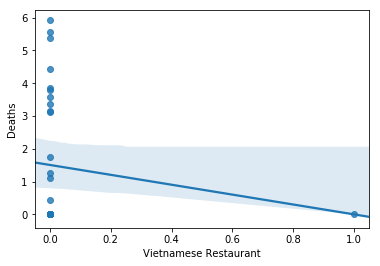

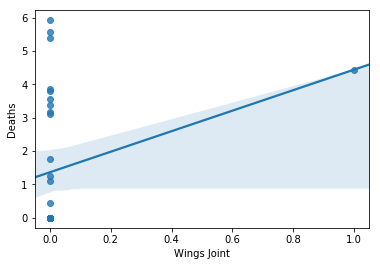

In [151]:
for i, col in enumerate(NY_food_grouped.iloc[:,3:].columns):
    plt.figure(i)
    sns.regplot(x=col, y="Deaths", data=NY_food_grouped)

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


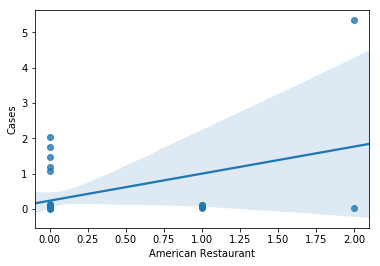

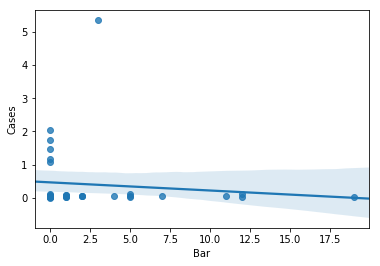

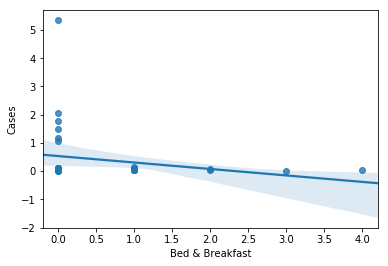

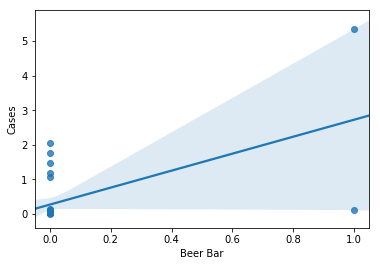

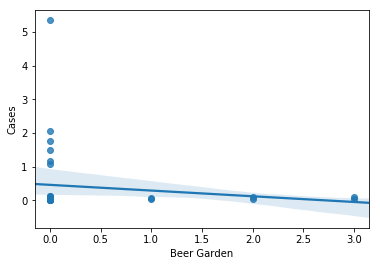

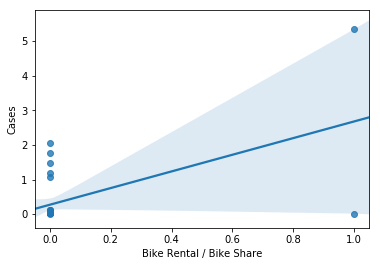

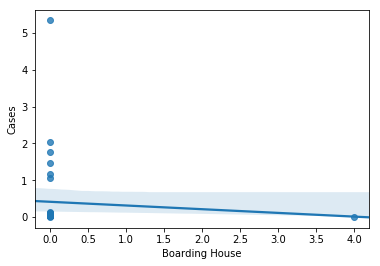

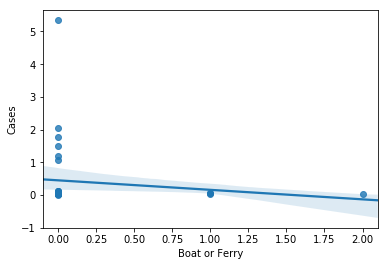

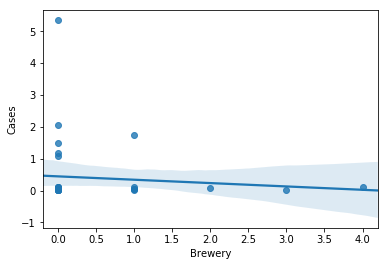

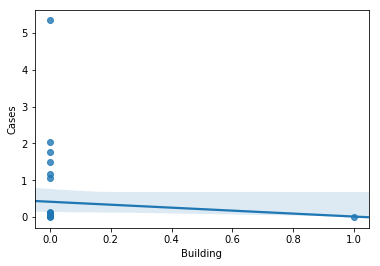

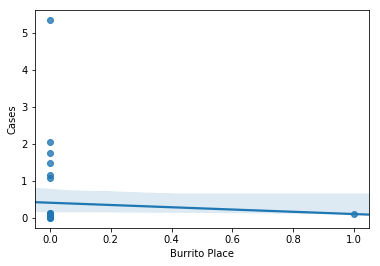

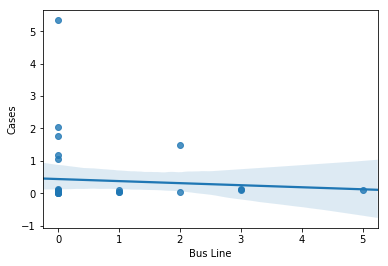

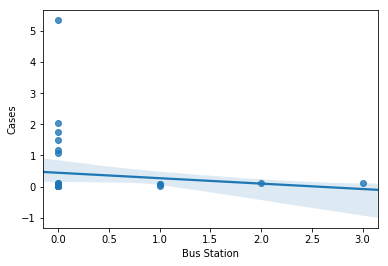

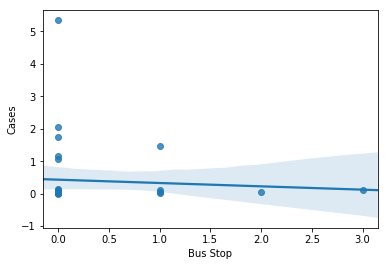

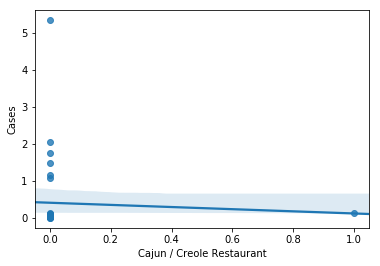

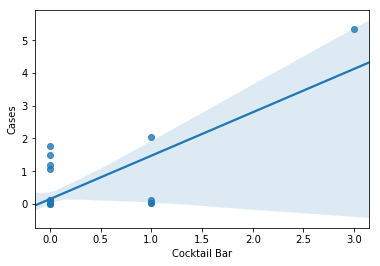

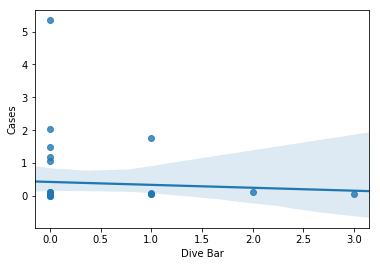

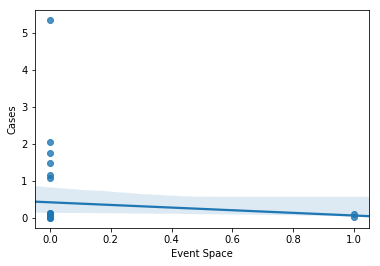

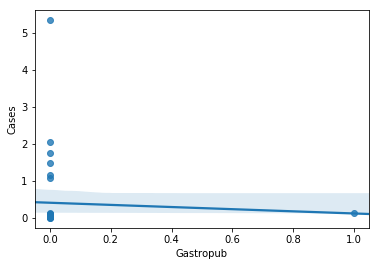

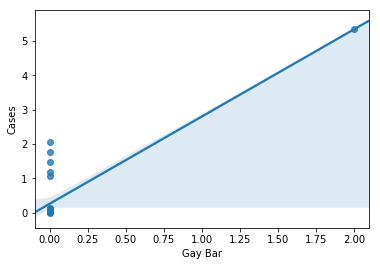

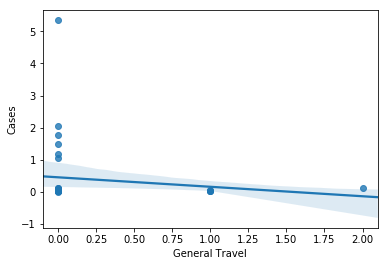

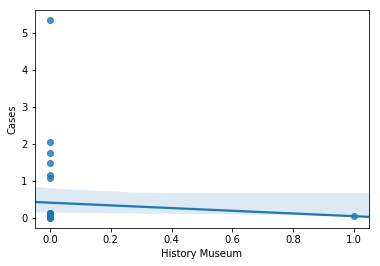

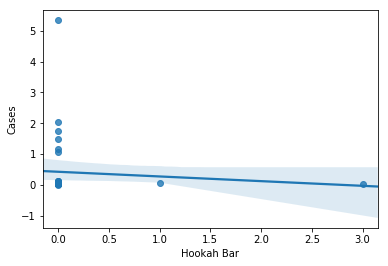

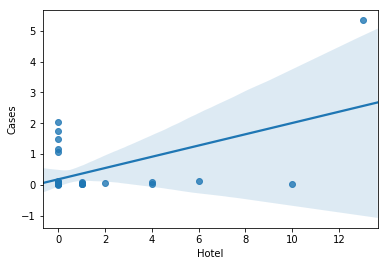

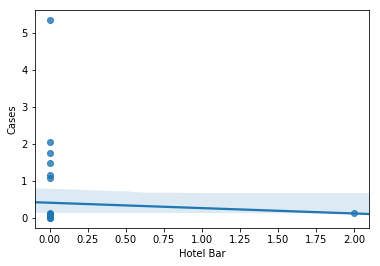

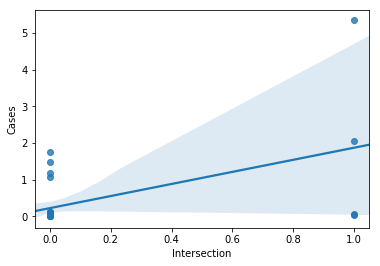

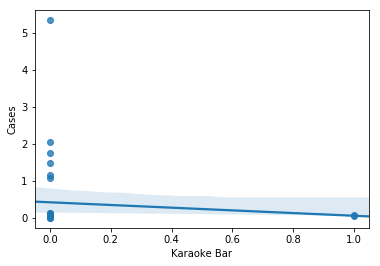

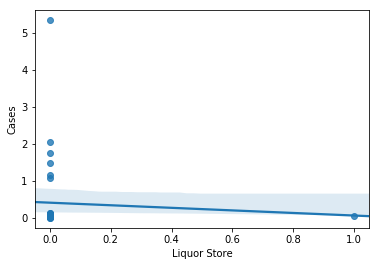

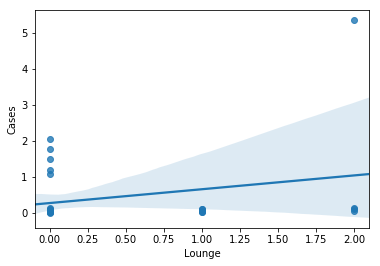

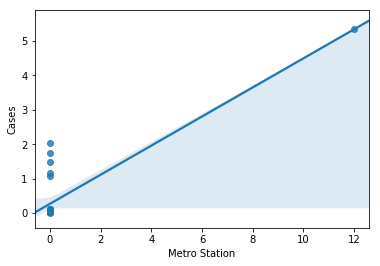

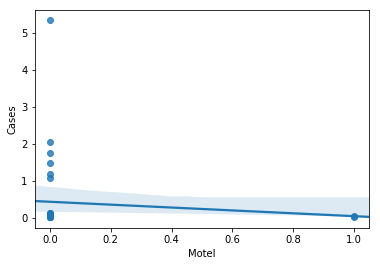

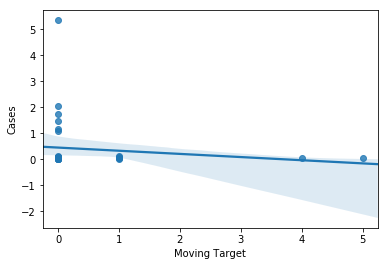

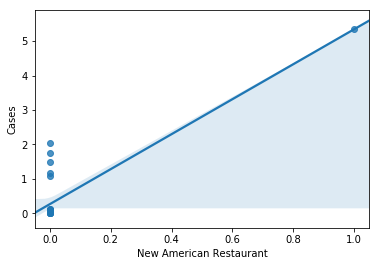

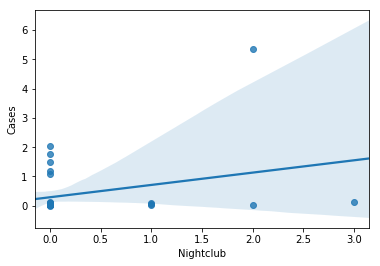

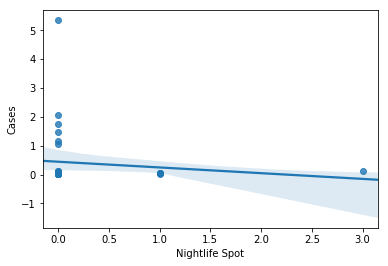

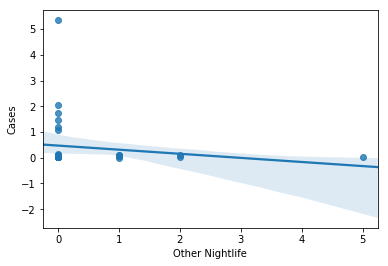

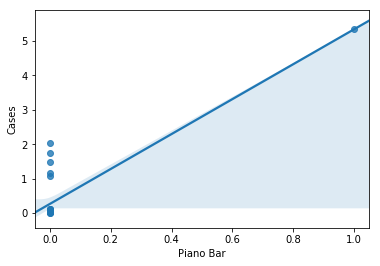

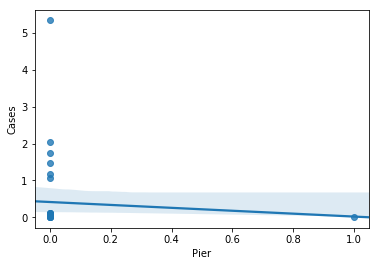

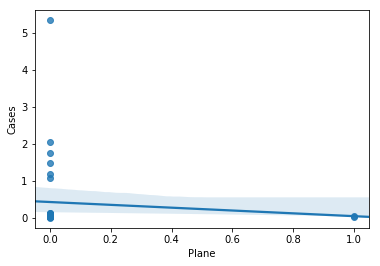

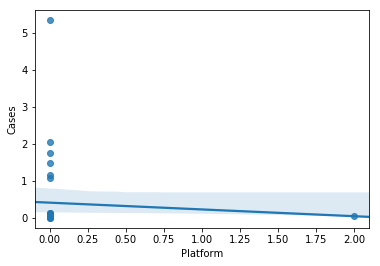

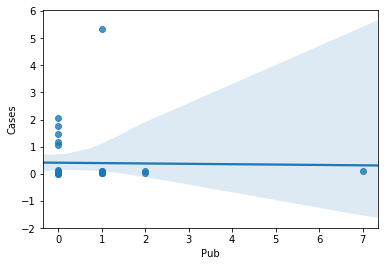

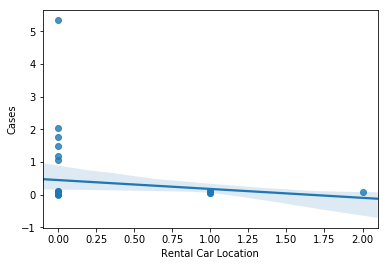

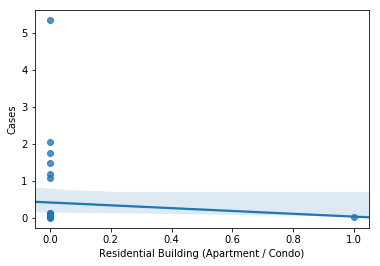

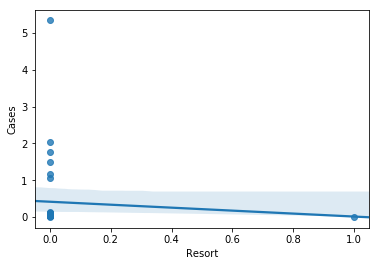

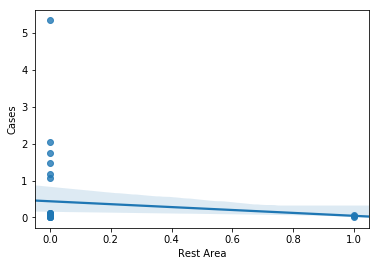

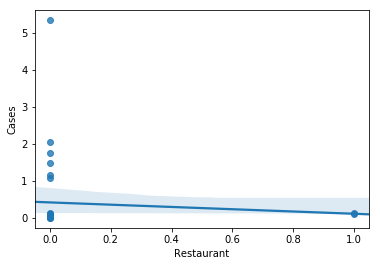

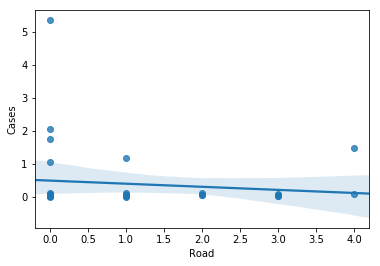

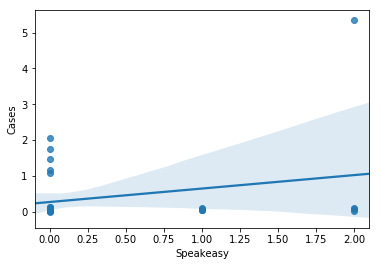

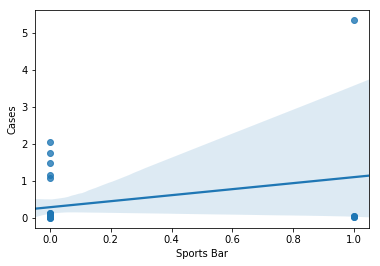

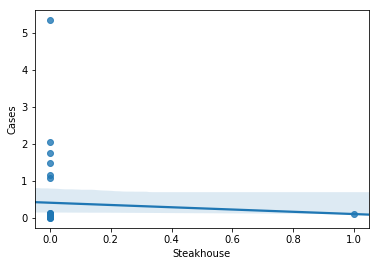

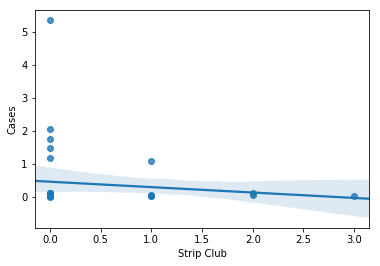

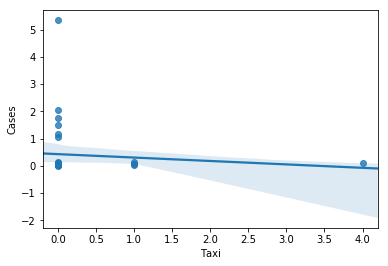

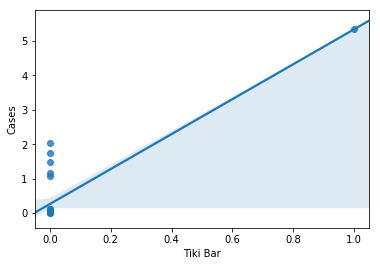

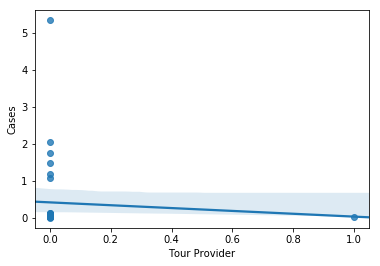

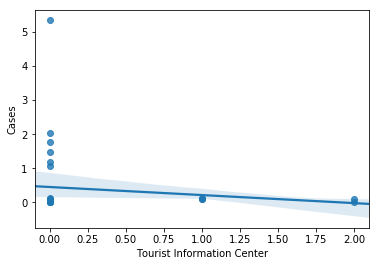

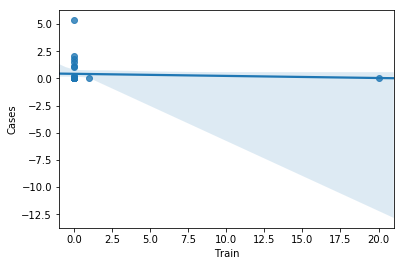

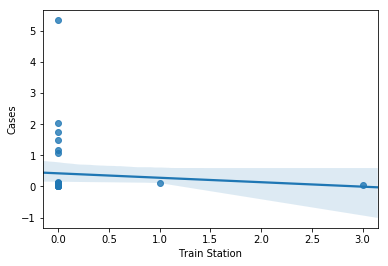

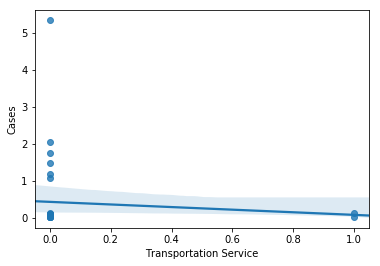

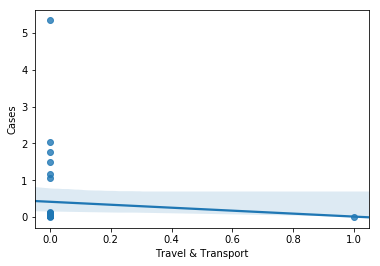

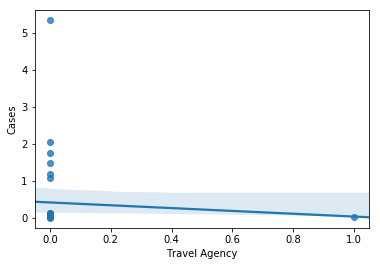

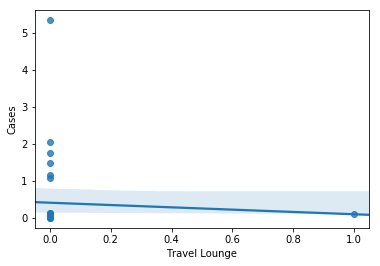

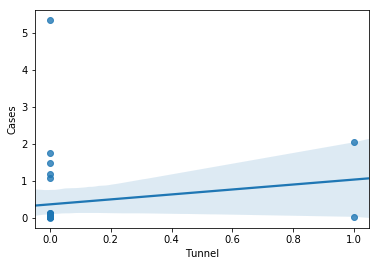

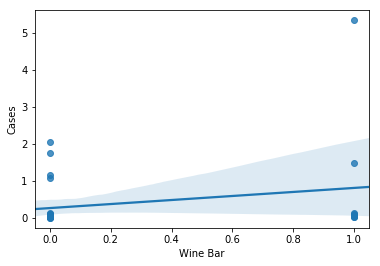

In [30]:
for i, col in enumerate(NY_TrvNL_grouped.iloc[:,3:].columns):
    plt.figure(i)
    sns.regplot(x=col, y="Cases", data=NY_TrvNL_grouped)

In [31]:
from scipy import stats

In [35]:

for i, col in enumerate(NY_TrvNL_grouped.iloc[:,3:].columns):
    pearson_coef, p_value = stats.pearsonr(NY_TrvNL_grouped[col], NY_TrvNL_grouped['Cases'])
    print(col,":")
    print("Pearson Correlation Coefficient is", pearson_coef, "\nP-value of P =", p_value)  

American Restaurant :
Pearson Correlation Coefficient is 0.4151059097774263 
P-value of P = 0.011819685666028723
Bar :
Pearson Correlation Coefficient is -0.10930146409944226 
P-value of P = 0.5257090177236555
Bed & Breakfast :
Pearson Correlation Coefficient is -0.2157262660902544 
P-value of P = 0.2063669114883813
Beer Bar :
Pearson Correlation Coefficient is 0.5725888383224378 
P-value of P = 0.00026299511632592933
Beer Garden :
Pearson Correlation Coefficient is -0.1407292085126491 
P-value of P = 0.41297948064238554
Bike Rental / Bike Share :
Pearson Correlation Coefficient is 0.5610594175326497 
P-value of P = 0.000371323335782046
Boarding House :
Pearson Correlation Coefficient is -0.0673160096941412 
P-value of P = 0.6964737983854882
Boat or Ferry :
Pearson Correlation Coefficient is -0.12389369679104144 
P-value of P = 0.4715813468007236
Brewery :
Pearson Correlation Coefficient is -0.09544772685250946 
P-value of P = 0.5797553552719515
Building :
Pearson Correlation Coefficie

In [55]:

for i, col in enumerate(NY_Food_grouped.iloc[:,3:].columns):
    pearson_coef, p_value = stats.pearsonr(NY_Food_grouped[col], NY_Food_grouped['Deaths'])
    print(col,":")
    print("Pearson Correlation Coefficient is", pearson_coef, "\nP-value of P =", p_value)

American Restaurant :
Pearson Correlation Coefficient is 0.27867318298128263 
P-value of P = 0.12247398443820566
Argentinian Restaurant :
Pearson Correlation Coefficient is -0.13241563753325059 
P-value of P = 0.4700210725733731
Asian Restaurant :
Pearson Correlation Coefficient is 0.24707264962371167 
P-value of P = 0.17279034176606997
BBQ Joint :
Pearson Correlation Coefficient is 0.054578956745121664 
P-value of P = 0.7667088048060274
Bagel Shop :
Pearson Correlation Coefficient is 0.31394499218660377 
P-value of P = 0.08014749089688783
Bakery :
Pearson Correlation Coefficient is 0.20217952351256796 
P-value of P = 0.2671259401441065
Bar :
Pearson Correlation Coefficient is 0.04321011808284643 
P-value of P = 0.8143501245685258
Bed & Breakfast :
Pearson Correlation Coefficient is 0.19122659523431063 
P-value of P = 0.2944465641944831
Bistro :
Pearson Correlation Coefficient is 0.1545072917804713 
P-value of P = 0.39848022354253754
Breakfast Spot :
Pearson Correlation Coefficient is 